# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import time
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from imblearn.over_sampling import SMOTE # pip install imbalanced-learn
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import math
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

In [99]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [19]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [23]:
# Missing values
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [25]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


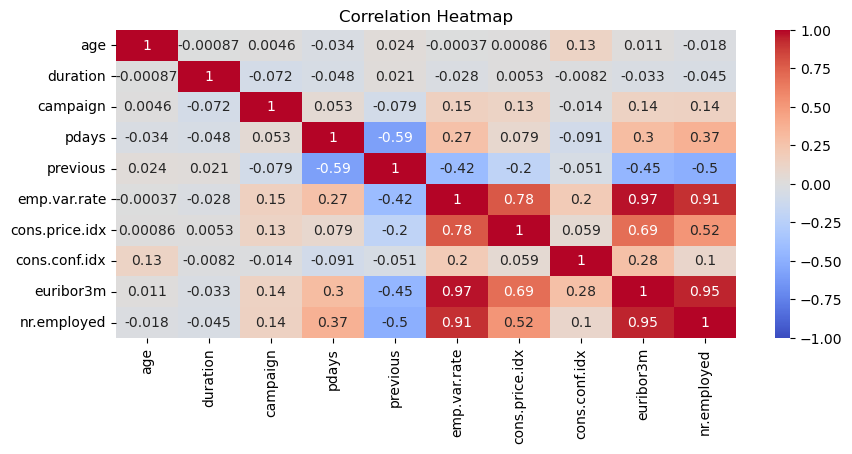

In [33]:
# Selecting numerical features only
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Heatmap on numerical features
plt.figure(figsize=(10, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

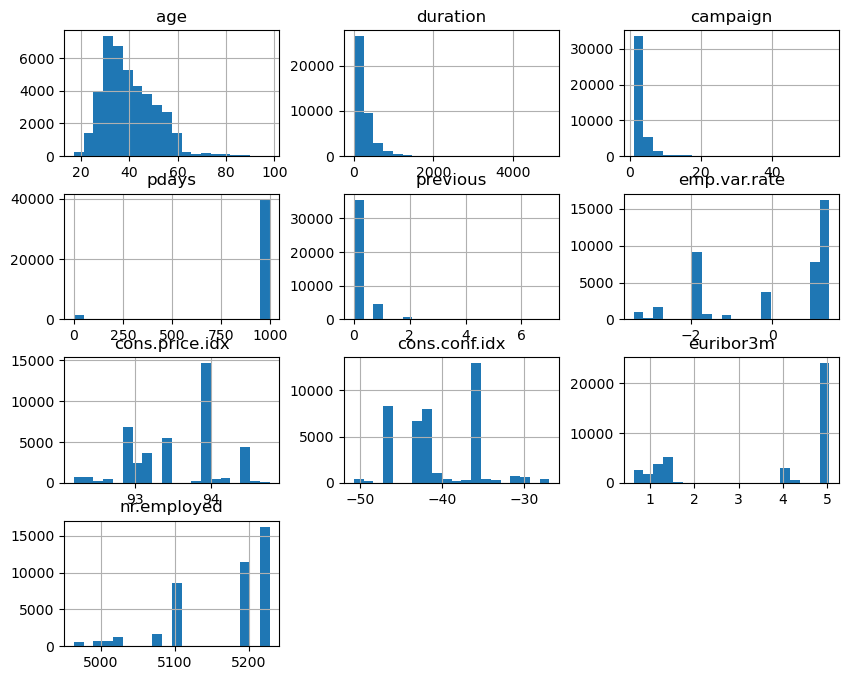

In [35]:
# Histogram for numerical variables
df_numeric.hist(bins=20, figsize=(10, 8))
plt.show()

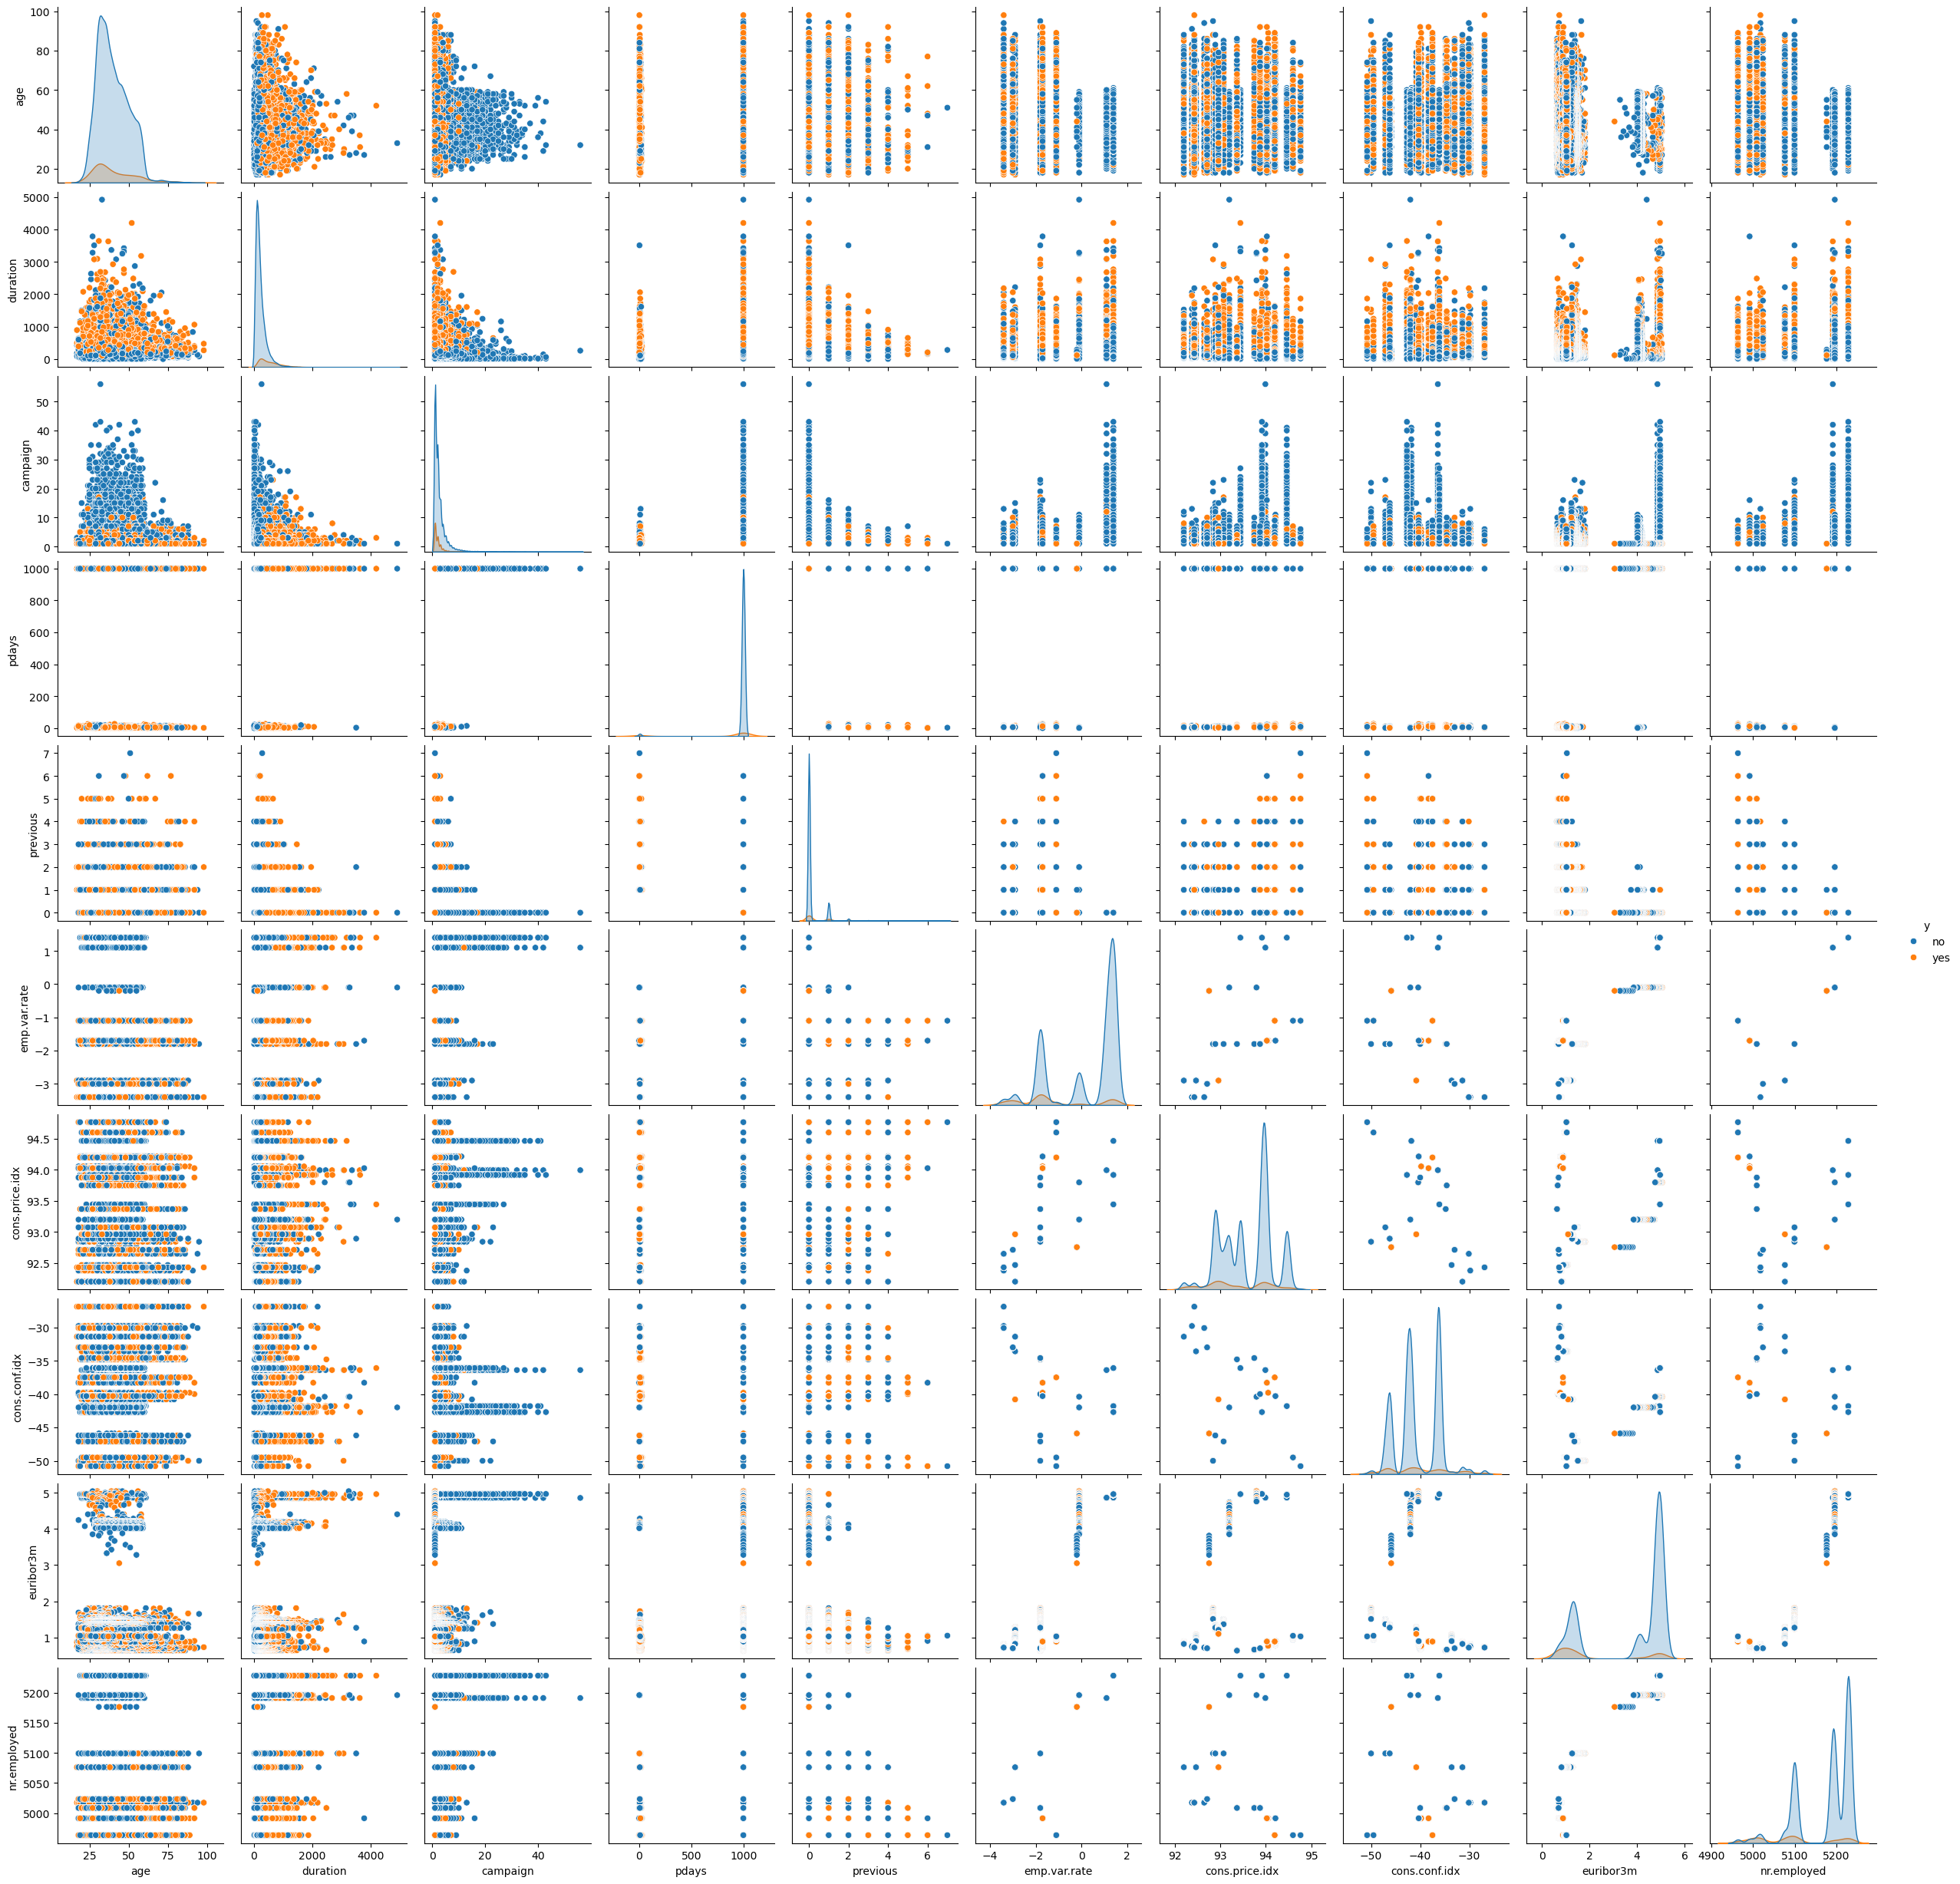

In [39]:
# Create a pairplot for all numerical variables, coloring by the 'Survived' variable.
sns.pairplot(df, hue='y')
plt.show()

In [45]:
useless_columns = ['duration']
df_new = df.drop(columns=useless_columns)  # Removing non-useful columns
df_new.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [150]:
# Define the features (X) and the target variable (y)
# Define which columns are categorical and which are numerical

categorical_columns = ['job', 'marital', 'education','default','housing','loan','contact','month','day_of_week','poutcome']
numerical_columns = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

X = df_new.drop('y', axis=1)
y = df_new['y']

In [152]:
# Split the dataset into training (train) and testing (test) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
# Create a preprocessor that applies both imputation and scaling to numerical columns and one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())
        ]), numerical_columns),
        ('cat', Pipeline(steps=[
            ('encode', TargetEncoder()) # Target encoding for categorical features
        ]), categorical_columns)
    ])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [167]:
X_train_processed = preprocessor.fit_transform(X_train,y_train)
X_test_processed = preprocessor.transform(X_test)

In [169]:
# Combine the names of numerical and categorical columns into a single list
all_column_names = list(numerical_columns) + list(categorical_columns)

# Convert the matrix into a DataFrame with the column names
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_column_names)

X_train_processed_df.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,-0.001669,-0.206242,-0.350902,0.838794,0.589080,-0.472769,0.771354,0.843165,0.069710,0.101433,0.078509,0.054448,0.115309,0.112090,0.050778,0.095272,0.097850,0.088550
1,-0.864095,0.513676,-0.350902,-1.199440,-1.180760,-1.229916,-1.372028,-0.939748,0.127775,0.101097,0.135738,0.128685,0.109913,0.113301,0.148141,0.062375,0.098034,0.088084
2,1.819007,1.233593,1.677559,-1.199440,-1.180760,-1.229916,-1.308581,-0.939748,0.245645,0.101355,0.103734,0.129059,0.106117,0.112017,0.148325,0.062932,0.100407,0.139266
3,0.285806,0.873635,-0.350902,0.838794,0.589080,-0.472769,0.771930,0.843165,0.099307,0.106941,0.078509,0.127713,0.115309,0.112090,0.147827,0.095272,0.116915,0.088550
4,-0.097494,-0.206242,-0.350902,0.647709,0.720307,0.890097,0.713674,0.330405,0.129914,0.138844,0.106510,0.050797,0.109152,0.112855,0.051013,0.061792,0.121288,0.088278


In [171]:
# Convert the matrix into a DataFrame with the column names
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_column_names)

X_test_processed_df.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,1.627357,-0.566200,1.677559,-1.199440,-1.180760,-1.229916,-1.340304,-0.939748,0.111547,0.101499,0.106909,0.128516,0.108319,0.110912,0.147674,0.062188,0.100252,0.140802
1,1.435707,-0.206242,-0.350902,0.647709,0.720307,0.890097,0.713674,0.330405,0.099282,0.101499,0.136506,0.051339,0.115721,0.112548,0.051088,0.062188,0.122234,0.088160
2,-0.672445,-0.566200,1.677559,-1.199440,-1.180760,-1.229916,-1.332229,-0.939748,0.069906,0.101499,0.079040,0.128516,0.108319,0.112548,0.147674,0.062188,0.106876,0.140802
3,-0.384970,0.513676,-0.350902,0.838794,1.533570,-0.278074,0.775391,0.843165,0.128960,0.101499,0.106909,0.128516,0.108319,0.112548,0.051088,0.105694,0.106876,0.088160
4,-1.247395,-0.206242,-0.350902,0.838794,0.589080,-0.472769,0.773084,0.843165,0.095749,0.101499,0.106909,0.128516,0.115721,0.112548,0.147674,0.091951,0.106876,0.088160


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [177]:
# Create a list of models to train
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),  # You can adjust the number of neighbors
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [189]:
results = {}

# Train each model with cross-validation
for model_name, model in models.items():
    print(f"Training and evaluating {model_name} with cross-validation...")
    start_time = time.time()  # Record start time

    # Perform cross-validation on the training set
    cv_scores = cross_val_score(
        model,
        X_train_processed_df,
        y_train,
        scoring='accuracy',
        cv=5,  # 5-fold cross-validation
        n_jobs=-1  # Use all available processors for faster computation
    )

    end_time = time.time()  # Record end time
    training_time = end_time - start_time

    # Train the model on the full training set
    model.fit(X_train_processed_df, y_train)
    train_accuracy = model.score(X_train_processed_df, y_train) # Calculate training accuracy
    test_accuracy = model.score(X_test_processed_df, y_test) # Assuming you have X_test_processed_df and y_test

    # Store the results in the dictionary
    results[model_name] = {
        'Training Time': training_time,
        'Cross-Validation Accuracy (mean)': cv_scores.mean(),
        'Cross-Validation Accuracy (std)': cv_scores.std(),
        'Training Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    }


Training and evaluating Logistic Regression with cross-validation...
Training and evaluating SVM with cross-validation...
Training and evaluating KNN with cross-validation...
Training and evaluating Decision Tree with cross-validation...
Training and evaluating Random Forest with cross-validation...


,Training Time,Cross-Validation Accuracy (mean),Cross-Validation Accuracy (std),Training Accuracy,Test Accuracy
SVM,21.672057,0.899575,0.002191,0.902064,0.896213
Logistic Regression,2.053899,0.897602,0.002371,0.897724,0.894149
Random Forest,3.699291,0.896328,0.003790,0.998483,0.894635
KNN,2.518244,0.885948,0.001513,0.912777,0.884317
Decision Tree,1.555709,0.835812,0.005981,0.998513,0.845715


### Problem 9: Score the Model

What is the accuracy of your model?

In [213]:
results_df = pd.DataFrame(results)
results_df

,Logistic Regression,SVM,KNN,Decision Tree,Random Forest
Training Time,2.053899,21.672057,2.518244,1.555709,3.699291
Cross-Validation Accuracy (mean),0.897602,0.899575,0.885948,0.835812,0.896328
Cross-Validation Accuracy (std),0.002371,0.002191,0.001513,0.005981,0.003790
Training Accuracy,0.897724,0.902064,0.912777,0.998513,0.998483
Test Accuracy,0.894149,0.896213,0.884317,0.845715,0.894635


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [193]:
results_df = pd.DataFrame(results).T.sort_values('Cross-Validation Accuracy (mean)', ascending=False)
results_df

,Training Time,Cross-Validation Accuracy (mean),Cross-Validation Accuracy (std),Training Accuracy,Test Accuracy
SVM,21.672057,0.899575,0.002191,0.902064,0.896213
Logistic Regression,2.053899,0.897602,0.002371,0.897724,0.894149
Random Forest,3.699291,0.896328,0.003790,0.998483,0.894635
KNN,2.518244,0.885948,0.001513,0.912777,0.884317
Decision Tree,1.555709,0.835812,0.005981,0.998513,0.845715


Training and evaluating Logistic Regression with cross-validation...


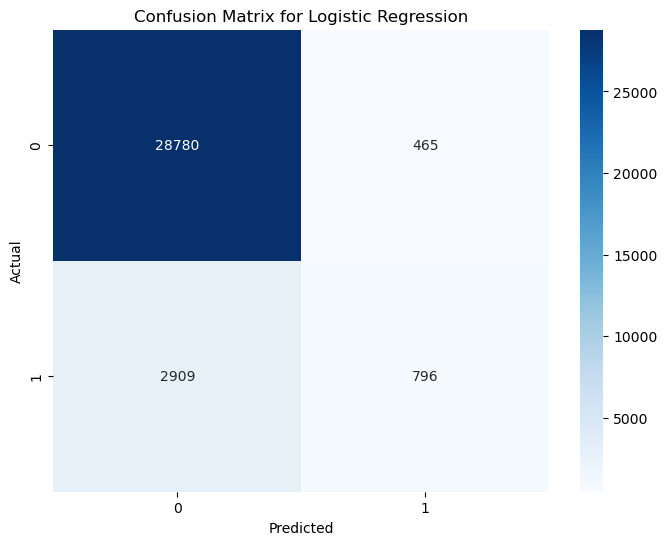

Training and evaluating SVM with cross-validation...


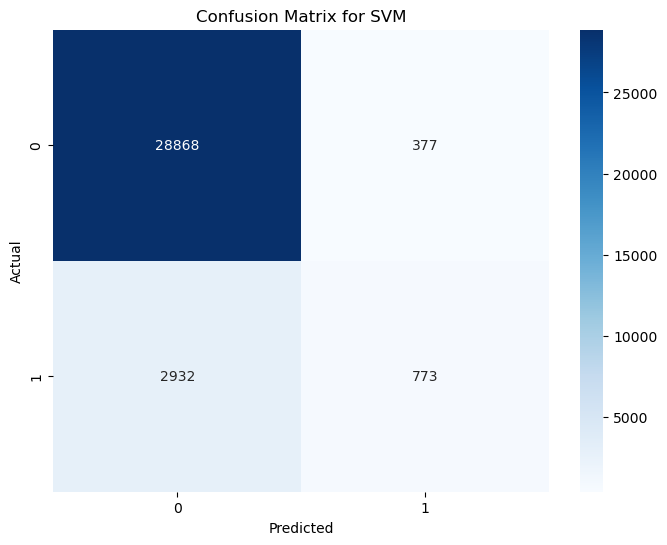

Training and evaluating KNN with cross-validation...


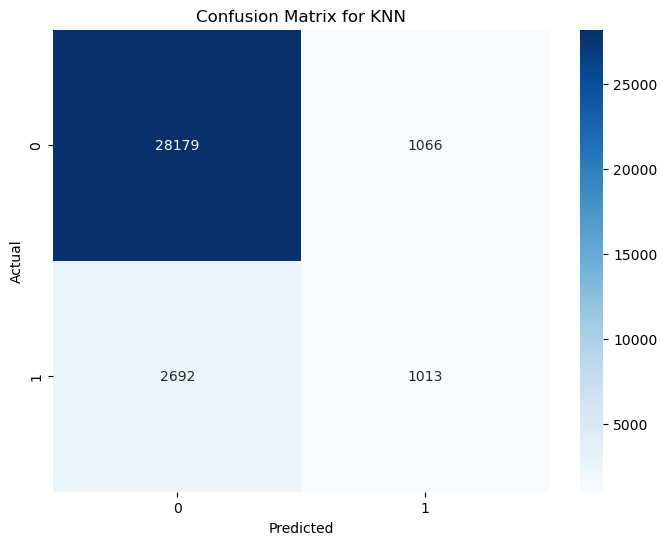

Training and evaluating Decision Tree with cross-validation...


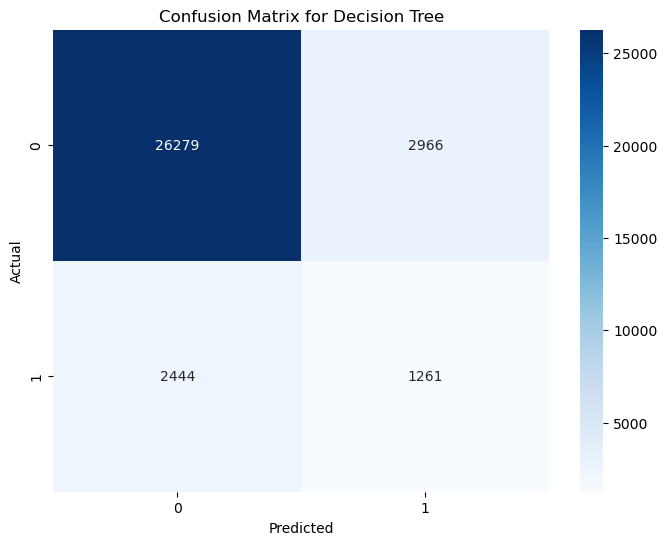

Training and evaluating Random Forest with cross-validation...


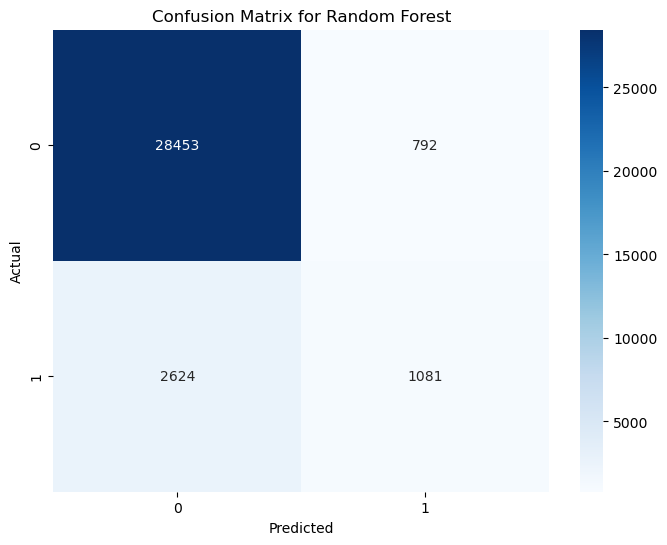

In [223]:
results = {}
for model_name, model in models.items():
    print(f"Training and evaluating {model_name} with cross-validation...")

    # Perform cross-validation and get predictions
    y_pred = cross_val_predict(model, X_train_processed_df, y_train, cv=5, n_jobs=-1)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_train, y_pred)

    # Store results (including the confusion matrix)
    results[model_name] = {
        'Confusion Matrix': cm,  # Store the confusion matrix itself
    }

    # Plot the confusion matrix for each model
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [231]:
# Looking at the confusion matrix, the data is highly unbalanced, so beter to balance it before training.... to check this i counted the number of ys and no in column 'y'
yes_count = df['y'].value_counts().get('yes', 0)
no_count = df['y'].value_counts().get('no', 0)
print(yes_count)
print(no_count)

4640
36548


In [241]:
# Initialize SMOTE
rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train_processed_df, y_train)
X_train_balanced = pd.DataFrame(X_train_balanced, columns = X_train_processed_df.columns)

C:\Users\saeed\anaconda3\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\saeed\anaconda3\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [308]:
yes_count = y_train_balanced.value_counts().get('yes', 0)
no_count = y_train_balanced.value_counts().get('no', 0)
print(yes_count)
print(no_count)

3705
3705


Training and evaluating Logistic Regression with cross-validation...


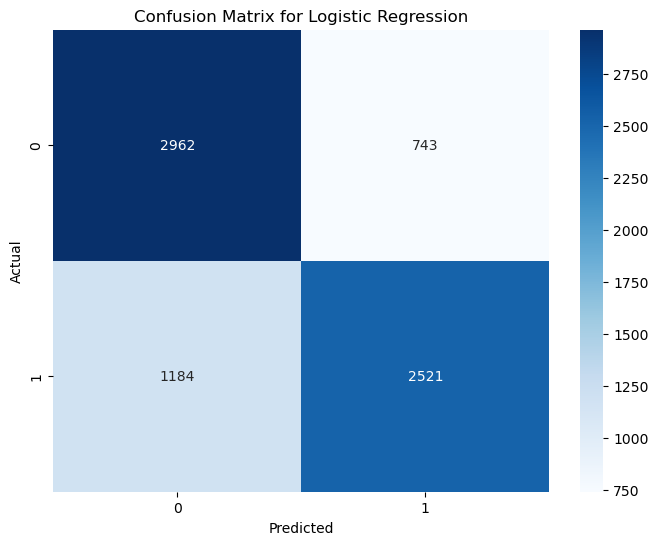

Training and evaluating SVM with cross-validation...


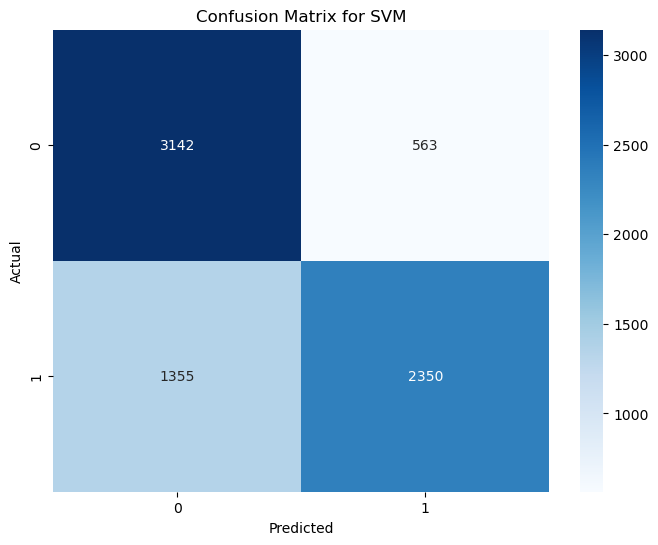

Training and evaluating KNN with cross-validation...


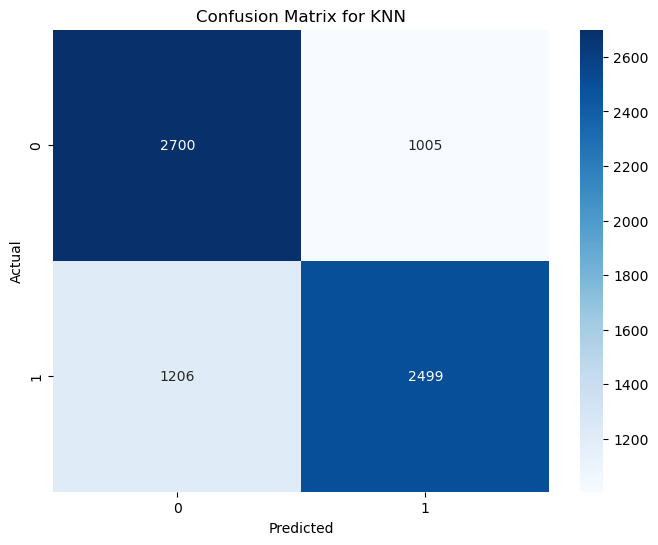

Training and evaluating Decision Tree with cross-validation...


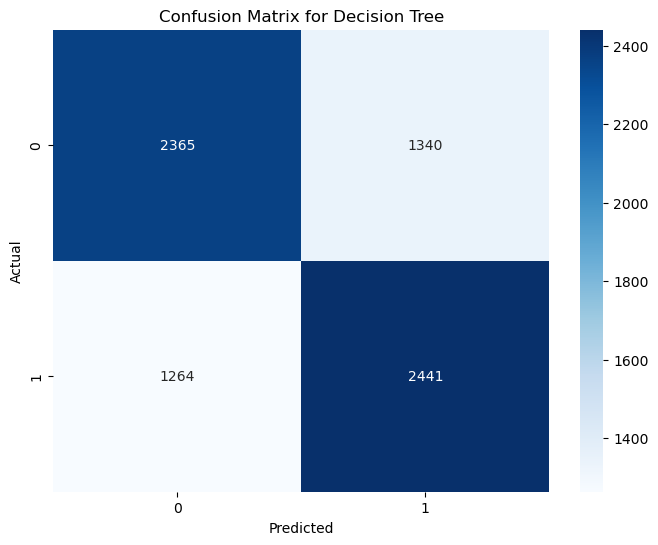

Training and evaluating Random Forest with cross-validation...


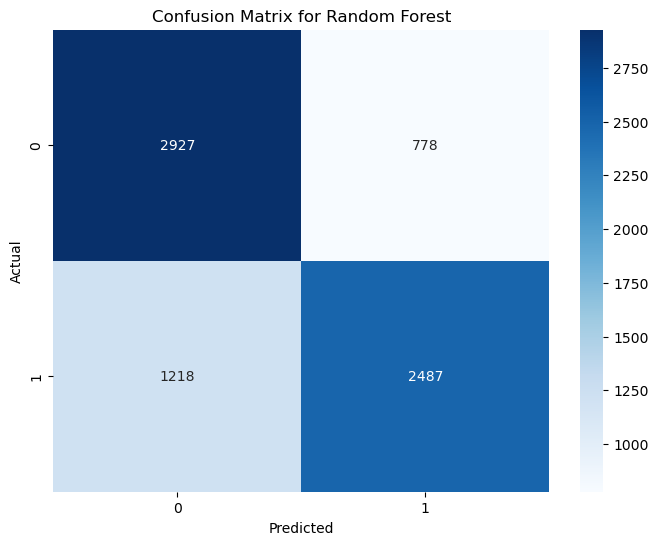

In [249]:
results = {}
for model_name, model in models.items():
    print(f"Training and evaluating {model_name} with cross-validation...")

    # Perform cross-validation and get predictions
    y_pred = cross_val_predict(model, X_train_balanced, y_train_balanced, cv=5, n_jobs=-1)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_train_balanced, y_pred)

    # Store results (including the confusion matrix)
    results[model_name] = {
        'Confusion Matrix': cm,  # Store the confusion matrix itself
    }

    # Plot the confusion matrix for each model
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [251]:
results = {}

# Train each model with cross-validation
for model_name, model in models.items():
    print(f"Training and evaluating {model_name} with cross-validation...")
    start_time = time.time()  # Record start time

    # Perform cross-validation on the training set
    cv_scores = cross_val_score(
        model,
        X_train_balanced,
        y_train_balanced,
        scoring='accuracy',
        cv=5,  # 5-fold cross-validation
        n_jobs=-1  # Use all available processors for faster computation
    )

    end_time = time.time()  # Record end time
    training_time = end_time - start_time

    # Train the model on the full training set
    model.fit(X_train_balanced, y_train_balanced)
    train_accuracy = model.score(X_train_balanced, y_train_balanced) # Calculate training accuracy
    test_accuracy = model.score(X_test_processed_df, y_test) # Assuming you have X_test_processed_df and y_test

    # Store the results in the dictionary
    results[model_name] = {
        'Training Time': training_time,
        'Cross-Validation Accuracy (mean)': cv_scores.mean(),
        'Cross-Validation Accuracy (std)': cv_scores.std(),
        'Training Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    }


Training and evaluating Logistic Regression with cross-validation...
Training and evaluating SVM with cross-validation...
Training and evaluating KNN with cross-validation...
Training and evaluating Decision Tree with cross-validation...
Training and evaluating Random Forest with cross-validation...


In [255]:
results_df = pd.DataFrame(results).T.sort_values('Cross-Validation Accuracy (mean)', ascending=False)
results_df

,Training Time,Cross-Validation Accuracy (mean),Cross-Validation Accuracy (std),Training Accuracy,Test Accuracy
SVM,1.661506,0.741161,0.002201,0.743455,0.831513
Logistic Regression,0.082073,0.739946,0.003879,0.739811,0.782957
Random Forest,1.554566,0.730634,0.006603,0.998650,0.818524
KNN,0.200200,0.701619,0.009717,0.783131,0.713644
Decision Tree,0.086028,0.648583,0.009077,0.998785,0.676621


In [261]:
# Hyperparameter grids for each model
param_grids = {
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }
}

In [263]:
# Initialize the best models dictionary
best_models = {}

# Perform grid search for each model
for model_name, params in param_grids.items():
    print(f"Tuning {model_name}...")
    if model_name == 'KNN':
        model = KNeighborsClassifier()
    elif model_name == 'SVM':
        model = SVC(random_state=42)
    elif model_name == 'Random Forest':
        model = RandomForestClassifier(random_state=42)

    # Set up GridSearchCV
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        scoring='accuracy',
        cv=5,
        verbose=1
    )

    # Fit the grid search
    grid_search.fit(X_train_balanced, y_train_balanced)

    # Store the best model
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best accuracy score for {model_name}: {grid_search.best_score_}\n")

Tuning KNN...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best accuracy score for KNN: 0.7218623481781377

Tuning SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy score for SVM: 0.7411605937921728

Tuning Random Forest...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best accuracy score for Random Forest: 0.7488529014844805



In [295]:
results_tuned = {}

# Train each model with cross-validation
for model_name, model in best_models.items():
    print(f"Training and evaluating {model_name} with cross-validation...")
    start_time = time.time()  # Record start time

    # Perform cross-validation on the training set
    cv_scores = cross_val_score(
        model,
        X_train_balanced,
        y_train_balanced,
        scoring='accuracy',
        cv=5,  # 5-fold cross-validation
        n_jobs=-1  # Use all available processors for faster computation
    )

    end_time = time.time()  # Record end time
    training_time = end_time - start_time

    # Train the model on the full training set
    model.fit(X_train_processed_df, y_train)
    train_accuracy = model.score(X_train_balanced, y_train_balanced) # Calculate training accuracy
    test_accuracy = model.score(X_test_processed_df, y_test) # Assuming you have X_test_processed_df and y_test

    # Store the results in the dictionary
    results_tuned[model_name] = {
        'Training Time': training_time,
        'Cross-Validation Accuracy (mean)': cv_scores.mean(),
        'Cross-Validation Accuracy (std)': cv_scores.std(),
        'Training Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    }




Training and evaluating KNN with cross-validation...
Training and evaluating SVM with cross-validation...
Training and evaluating Random Forest with cross-validation...


In [297]:
results_df = pd.DataFrame(results).T.sort_values('Cross-Validation Accuracy (mean)', ascending=False)
results_df

,Training Time,Cross-Validation Accuracy (mean),Cross-Validation Accuracy (std),Training Accuracy,Test Accuracy
Random Forest,1.949040,0.748853,0.002151,0.672065,0.896455
SVM,2.949351,0.741161,0.002201,0.608367,0.896213
KNN,1.988579,0.721862,0.002391,0.653441,0.888929


Training and evaluating KNN with cross-validation...


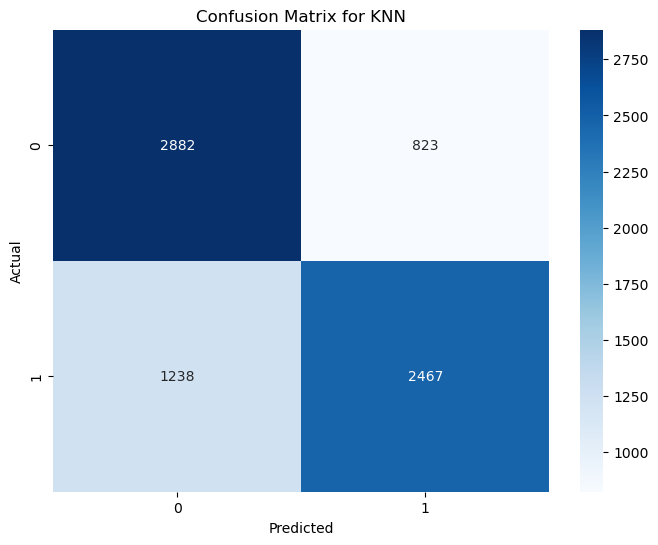

Training and evaluating SVM with cross-validation...


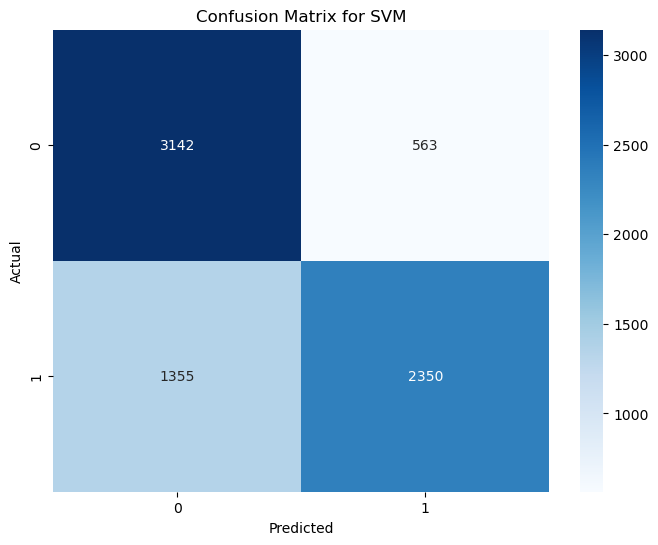

Training and evaluating Random Forest with cross-validation...


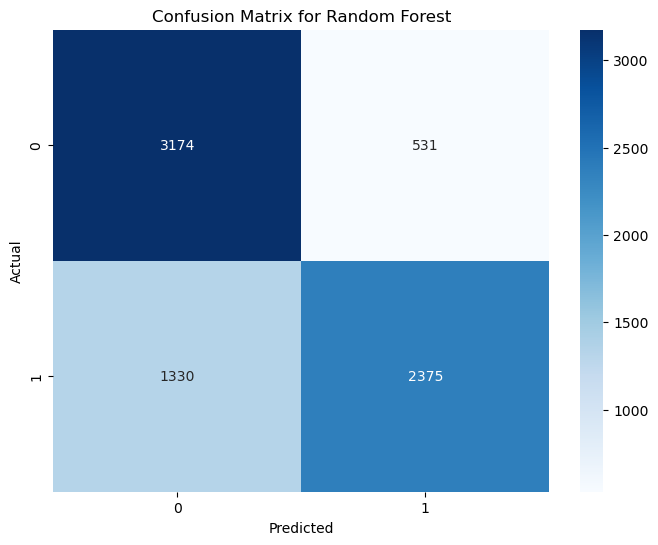

In [322]:
results_tuned = {}

for model_name, model in best_models.items():
    print(f"Training and evaluating {model_name} with cross-validation...")

    # Perform cross-validation and get predictions
    y_pred = cross_val_predict(model, X_train_balanced, y_train_balanced, cv=5, n_jobs=-1)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_train_balanced, y_pred)
    recall = recall_score(y_train_balanced, y_pred, average='weighted') 

    # Store results (including the confusion matrix)
    results_tuned [model_name] = {
        'Confusion Matrix': cm,  # Store the confusion matrix itself
        'Recall': recall,
    }

    # Plot the confusion matrix for each model
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



In [320]:
print(results_tuned)

{'KNN': {'Confusion Matrix': array([[2882,  823],
       [1238, 2467]], dtype=int64), 'Recall': 0.7218623481781377}, 'SVM': {'Confusion Matrix': array([[3142,  563],
       [1355, 2350]], dtype=int64), 'Recall': 0.7411605937921727}, 'Random Forest': {'Confusion Matrix': array([[3174,  531],
       [1330, 2375]], dtype=int64), 'Recall': 0.7488529014844805}}


##### Questions